# 미세먼지 현황 분석


### 0. 프로젝트 개요
<span style="font-size:18px"> 1) 미세먼지 문제 현황 </span> <br> 
<span style="font-size:14px"> - https://www.etoday.co.kr/news/view/2188210 <br> - https://www.news1.kr/articles/4851177 <br> - https://www.mk.co.kr/news/society/view/2022/10/929390/ </span>

<span style="font-size:18px"> 2) 프로젝트 목적 및 주제 </span> <br>
<span style="font-size:16px"> - 목적 </span> <br>
<p style="font-size:14px">  ① 미세먼지 영향요인 분석 <br> ② 미세먼지 변화양상 파악 <br> ③ 미세먼지 측정량 예측 </p>

<span style="font-size:16px">- 주제 : 미세먼지 측정량 예측으로 미세먼지 배출 저감 정책을 진흥시키기 위한 인사이트를 도출하고자 한다


<span style="font-size:16px"> ▶ 패키지 불러오기 </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#------------------------------------------
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
#------------------------------------------
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import matplotlib.font_manager as fm
font_fname = font_fname = "c:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_fname, size=18).get_name()
matplotlib.rc('font',family= fontprop)
matplotlib.rc('axes',unicode_minus=False)
#------------------------------------------
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ['PATH']+= os.pathsep+'C:/Program files(x86)/Graphviz2.38'
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
#------------------------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error

<span style="font-size:16px"> ▶ 데이터 불러오기 </span>

### 1. 데이터 이해

<span style="font-size:18px"> 1) 사용한 데이터셋 </span>

In [2]:
df = pd.read_csv("~/AIR_POLLUTION.csv",parse_dates=['MeasDate'])
df

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21
363,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63
364,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   366 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       366 non-null    float64       
 7   RAIN       366 non-null    float64       
 8   WIND       366 non-null    float64       
 9   WIND_DIR   366 non-null    int64         
 10  HUMIDITY   366 non-null    float64       
 11  ATM_PRESS  366 non-null    float64       
 12  SNOW       366 non-null    float64       
 13  CLOUD      366 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 40.2 KB


In [4]:
df.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

<span style="font-size:18px"> 2) 변수 구성 : 대기성분 </span>

<span style="font-size:16px"> ▶ 컬럼 정보 : 'PM10', 'O3', 'NO2', 'CO', 'SO2' </span><br>
<span style='font-size:14px;color:black'> - 오존 농도 <br> - 이산화질소 농도 <br> - 일산화탄소 농도 <br> - 아황산가스 농도</span>

<span style="font-size:18px"> 3) 변수 구성 : 기후 </span>

<span style="font-size:16px"> ▶ 컬럼 정보: 'TEMP', 'RAIN', 'WIND', 'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'SNOW', 'CLOUD' </span><br>
<span style='font-size:14px;color:black'> - 기온(°C) <br> - 강수량(mm) <br> - 풍속(m/s) <br> - 풍향(16방위) - 습도(%) <br> - 현지기압(hPa) <br> - 적설(cm) <br> - 전운량(10분위) </span>

### 2. 데이터 전처리

<span style="font-size:16px"> 1) 데이터 확인 </span> <br>
<span style="font-size:14px"> • https://data.kma.go.kr/data/grnd/selectAwosRltmList.do?pgmNo=638 기상자료개방포털[데이터:기상관측:지상:공공기관 기상관측:자료] <br> • https://data.kma.go.kr/climate/RankState/selectRankStatisticsDivisionList.do 기상자료개방포털[기후통계분석:통계분석:조건별통계] <br> • https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-10days.do <BR> • https://www.airkorea.or.kr/web/contents/contentView/?pMENU_NO=91&cntnts_no=1 <BR> • https://www.airkorea.or.kr/web/pastSearch?pMENU_NO=123 <br><br>
    
    -> 이상치가 없다. 모두 관측되는 값들로 구성되어있다.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   366 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       366 non-null    float64       
 7   RAIN       366 non-null    float64       
 8   WIND       366 non-null    float64       
 9   WIND_DIR   366 non-null    int64         
 10  HUMIDITY   366 non-null    float64       
 11  ATM_PRESS  366 non-null    float64       
 12  SNOW       366 non-null    float64       
 13  CLOUD      366 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 40.2 KB


In [6]:
df.describe()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000000,365.000000,365.000000,311.000000,365.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,33.421918,0.023600,0.026814,0.517042,0.003033,13.863798,0.381639,2.225301,209.450820,60.295082,1005.848907,0.022951,5.064016
std,15.937983,0.011896,0.010271,0.152820,0.000632,9.830280,1.122127,0.723171,70.735018,14.534983,8.126823,0.222361,2.986119
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000,0.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.492500,0.000000,1.722500,160.250000,49.650000,999.400000,0.000000,2.510000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,14.000000,0.000000,2.095000,221.000000,61.050000,1006.450000,0.000000,5.310000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.070000,0.115000,2.620000,266.000000,69.950000,1011.575000,0.000000,7.570000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,11.800000,5.880000,351.000000,95.000000,1025.500000,3.200000,10.000000


<span style="font-size:16px"> 2) 결측치/이상치 처리 </span> 

In [7]:
df.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

<span style="font-size:14px"> • 목표변수가 결측인 데이터 제거(PM10)

In [8]:
# 목표변수가 결측인 데이터 제거
df=df.dropna(axis=0,subset=['PM10'])
# 데이터 확인
df.isnull().sum()

MeasDate      0
PM10          0
O3            0
NO2           0
CO           54
SO2           0
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

<span style="font-size:14px"> • CO 결측치 대체

In [9]:
#최빈값 찾기
df['CO'].mode()

0    0.4
1    0.5
Name: CO, dtype: float64

In [10]:
df[df['CO']==0.4]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54
8,2019-07-09,10.0,0.033,0.019,0.4,0.002,25.11,0.00,1.84,81,46.3,996.7,0.0,4.42
21,2019-07-22,46.0,0.041,0.022,0.4,0.003,26.68,0.03,2.13,230,74.7,996.2,0.0,7.42
22,2019-07-23,26.0,0.018,0.023,0.4,0.003,27.90,0.00,1.74,192,71.5,995.5,0.0,8.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2020-06-19,21.0,0.036,0.015,0.4,0.003,24.79,0.03,2.20,172,61.5,995.9,0.0,7.38
356,2020-06-21,30.0,0.042,0.014,0.4,0.003,25.82,0.00,1.96,254,59.8,998.2,0.0,0.29
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21


<span style="font-size:14px"> → 0.4, 0.5 모두 90행씩 있다

In [11]:
# CO 결측치는 최빈값의 평균(0.45)으로 대체
df['CO'].fillna(0.45,inplace=True)
df = df.dropna(axis=0)
df_1 = df.copy()
# 사용하지 않는 열 삭제
df=df.drop(['MeasDate'],axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10       365 non-null    float64
 1   O3         365 non-null    float64
 2   NO2        365 non-null    float64
 3   CO         365 non-null    float64
 4   SO2        365 non-null    float64
 5   TEMP       365 non-null    float64
 6   RAIN       365 non-null    float64
 7   WIND       365 non-null    float64
 8   WIND_DIR   365 non-null    int64  
 9   HUMIDITY   365 non-null    float64
 10  ATM_PRESS  365 non-null    float64
 11  SNOW       365 non-null    float64
 12  CLOUD      365 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 39.9 KB


In [13]:
df_air = df[['PM10','O3', 'NO2', 'CO', 'SO2']]
df_air.describe()

,PM10,O3,NO2,CO,SO2
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,33.421918,0.023600,0.026814,0.507123,0.003033
std,15.937983,0.011896,0.010271,0.143029,0.000632
min,5.000000,0.002000,0.008000,0.300000,0.002000
25%,22.000000,0.014000,0.019000,0.400000,0.003000
50%,31.000000,0.023000,0.025000,0.500000,0.003000
75%,42.000000,0.032000,0.034000,0.600000,0.003000
max,101.000000,0.062000,0.059000,1.000000,0.005000


In [14]:
df_wea = df[['TEMP', 'RAIN', 'WIND', 'WIND_DIR', 'HUMIDITY', 
             'ATM_PRESS', 'SNOW', 'CLOUD']]
df_wea.describe().round(3)

,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000
mean,13.854,0.379,2.224,209.321,60.232,1005.867,0.023,5.055
std,9.842,1.122,0.723,70.788,14.505,8.131,0.223,2.986
min,-7.950,0.000,0.940,50.000,17.900,983.800,0.000,0.000
25%,5.480,0.000,1.720,160.000,49.600,999.400,0.000,2.500
50%,13.870,0.000,2.090,221.000,61.000,1006.500,0.000,5.290
75%,23.100,0.100,2.620,266.000,69.800,1011.600,0.000,7.540
max,31.720,11.800,5.880,351.000,95.000,1025.500,3.200,10.000


<AxesSubplot:>

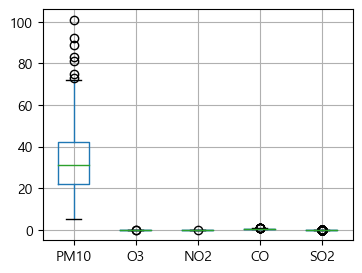

In [15]:
plt.figure(figsize=(4,3))
df_air.boxplot()

### 3. 통계적 검정
<span style="font-size:16px"> 1) 정규성 검정

<span style="font-size:14px"> • STEP1.가설 수립 <br> • H0: PM10은 정규성을 만족한다. <br> • H1: PM10은 정규성을 만족하지 않는다. <br> --- <br> • STEP2. 유의수준 설립 <br> • 유의수준(a)은 0.05로 설정한다. <br> --- <br> • STEP3. 검정 작업_Shapiro

In [16]:
# pm10 : 정규성을 만족한다.

data1= df['PM10']
#정규성검정
stats.shapiro(data1)

#shapiro-wilk test
statistic, p = stats.shapiro(data1)

print("Shapiro-Wilk Test: statistic={:.3f}, p-value={:.3f}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.949, p-value=0.000


In [17]:
for i in range(11): 
    data1= df.iloc[:,i]
    statistic, p = stats.shapiro(data1)
    print("- {}".format(df.columns[i]))
    print("Shapiro-Wilk Test: statistic={:.3f}, p-value={:.3f}".format(statistic,p))

- PM10
Shapiro-Wilk Test: statistic=0.949, p-value=0.000
- O3
Shapiro-Wilk Test: statistic=0.982, p-value=0.000
- NO2
Shapiro-Wilk Test: statistic=0.968, p-value=0.000
- CO
Shapiro-Wilk Test: statistic=0.889, p-value=0.000
- SO2
Shapiro-Wilk Test: statistic=0.785, p-value=0.000
- TEMP
Shapiro-Wilk Test: statistic=0.953, p-value=0.000
- RAIN
Shapiro-Wilk Test: statistic=0.383, p-value=0.000
- WIND
Shapiro-Wilk Test: statistic=0.935, p-value=0.000
- WIND_DIR
Shapiro-Wilk Test: statistic=0.958, p-value=0.000
- HUMIDITY
Shapiro-Wilk Test: statistic=0.995, p-value=0.274
- ATM_PRESS
Shapiro-Wilk Test: statistic=0.991, p-value=0.021


<span style="font-size:14px"> • STEP4. 결과해석 <br> • 정규성 검정결과 검정통계량은 0.94이다. <br> • p-value < 0.05 = a이기 때문에 대립가설을 채택하며, PM10은 정규성을 만족하지 않는다. <br> --- <br> • 정규성 만족 X : O3, NO2, CO, SO2, TEMP,RAIN, ATM_PRESS(0.021),SNOW, CLOUD <br> • 정규성 만족 : HUMIDITY(0.274), 

<span style="font-size:16px"> 2) 가설검정 </span> 

<span style="font-size:14px"> • STEP1.가설 수립 <br> • H0: 비가 오는 날과 오지 않는 날의 평균 미세먼지 측정량은 같다. <br> • H1: 비가 오는 날과 오지 않는 날의 평균 미세먼지 측정량은 다르다. <br> --- <br> • STEP2. 유의수준 설립 <br> • 유의수준(a)은 0.05로 설정한다. <br> --- <br> • STEP3. 검정 작업_2-Sample t-test 

In [18]:
# 데이터 분리
df_rain = df[df['RAIN']>0]
df_norain = df[df['RAIN']==0]

# 정규성 확인 ) 귀무가설 : 정규성을 만족한다
statistic1,p1= stats.shapiro(df_rain['PM10'])
statistic2,p2= stats.shapiro(df_norain['PM10'])

print("p-value_rain={:.3f}".format(p1))
print("p-value_norain={:.3f}".format(p2))

p-value_rain=0.000
p-value_norain=0.000


<span style="font-size:14px"> • p-value < 0.05 = a이기 때문에 귀무가설을 기각하며, 정규성을 만족하지 않는다.

In [19]:
# 정규성 만족 못함. // 등분산성 검정
s,p=stats.mannwhitneyu(df_rain['PM10'],df_norain['PM10'])
print("p-value_등분산={:.5f}".format(p))

p-value_등분산=0.00016


<span style="font-size:14px"> • p-value=0.0001<0.05=a이기 때문에 귀무가설을 기각하며, 등분산성을 만족하지 않는다.

In [20]:
#2sample ttest
t_result = stats.ttest_ind(df_rain['PM10'],df_norain['PM10'])
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

#2sample ttest의 t,p값 출력
print("2-sample ttest")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-sample ttest
t 통계량 : -2.904
p-value : 0.004


<span style="font-size:14px"> • p-value = 0.041 < 0.05 = a이기 때문에 대립가설을 채택하며, 비가 오는 날과 오지 않는 날의 평균 미세먼지 측정량은 다르다고 할 수 있다. <br><br> => 비는 미세먼지 측정에 영향을 미친다.

<span style="font-size:14px"> • STEP1.가설 수립 <br> • H0: 바람이 약한(평균이하인) 날과 강한(평균 이상인) 날의 미세먼지 측정량이 같다.<br> • H1: 바람이 약한(평균이하인) 날과 강한(평균 이상인) 날의 미세먼지 측정량이 다르다. <br> --- <br> • STEP2. 유의수준 설립 <br> • 유의수준(a)은 0.05르 설정한다. <br> --- <br> • STEP3. 검정 작업_2-Sample t-test

In [21]:
# 데이터 분리
df_strong = df[df['WIND']>np.mean(df['WIND'])]
df_weak = df[df['WIND']<np.mean(df['WIND'])]

# 정규성 확인
statistic1,p1= stats.shapiro(df_strong['PM10'])
statistic2,p2= stats.shapiro(df_weak['PM10'])

print("p-value_wind_strong={:.5f}".format(p1))
print("p-value_wind_weak={:.5f}".format(p2))

p-value_wind_strong=0.00001
p-value_wind_weak=0.00000


<span style="font-size:14px"> • p-value < 0.05 = a이기 때문에 귀무가설을 기각하며, 정규성을 만족하지 않는다.

In [22]:
# 정규성 만족 못함. // 등분산성 검정
s,p=stats.bartlett(df_strong['PM10'],df_weak['PM10'])
print("p-value_등분산={:.5f}".format(p))

p-value_등분산=0.21736


<span style="font-size:14px"> • p-value=0.21>0.05=a이기 때문에 귀무가설을 채택하며, 등분산성을 만족한다.

In [23]:
#2sample ttest
t_result = stats.ttest_ind(df_strong['PM10'],df_weak['PM10'])
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

#2sample ttest의 t,p값 출력
print("2-sample ttest")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-sample ttest
t 통계량 : -1.891
p-value : 0.059


<span style="font-size:14px"> • 바람이 약한(평균이하인) 날과 강한(평균 이상인) 날의 미세먼지 측정량이 같다. <br> <br>=> 미세먼지 측정량에 바람의 영향이 적다. 

<span style="font-size:18px"> 3) 상관분석 

<span style="font-size:14px"> •  PM10과 상관성을 갖는 변수를 확인한다.

In [24]:
df.corr(method='spearman').round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
PM10,1.000,-0.037,0.379,0.565,0.463,-0.322,-0.208,-0.094,-0.008,-0.178,0.254,-0.019,-0.209
O3,-0.037,1.000,-0.600,-0.512,-0.267,0.504,-0.129,0.224,0.249,-0.025,-0.547,-0.018,-0.134
NO2,0.379,-0.600,1.000,0.766,0.551,-0.210,-0.075,-0.567,-0.412,-0.067,0.414,-0.104,0.019
CO,0.565,-0.512,0.766,1.000,0.576,-0.377,-0.031,-0.396,-0.281,0.018,0.422,-0.031,0.011
SO2,0.463,-0.267,0.551,0.576,1.000,-0.281,-0.278,-0.230,-0.102,-0.294,0.349,-0.042,-0.200
TEMP,-0.322,0.504,-0.210,-0.377,-0.281,1.000,0.161,-0.212,-0.098,0.416,-0.802,-0.203,0.333
RAIN,-0.208,-0.129,-0.075,-0.031,-0.278,0.161,1.000,0.178,-0.175,0.600,-0.340,0.096,0.617
WIND,-0.094,0.224,-0.567,-0.396,-0.230,-0.212,0.178,1.000,0.325,-0.093,-0.036,0.135,0.001
WIND_DIR,-0.008,0.249,-0.412,-0.281,-0.102,-0.098,-0.175,0.325,1.000,-0.117,0.078,0.115,-0.297
HUMIDITY,-0.178,-0.025,-0.067,0.018,-0.294,0.416,0.600,-0.093,-0.117,1.000,-0.515,-0.019,0.619


<span style="font-size:14px"> • PM10은 NO2, CO, SO2,TEMP, RAIN, HUMIDITY, ATM_PRESS, CLOUD과 상관성을 갖는다. <br> • 그 중 TEMP, RAIN, HUMIDITY, CLOUD는 PM10과 음의 상관관계를 가진다. <br> • 앞서 진행한 가설검정에서 비는 미세먼지에 영향을 미치고 바람은 미치지 않는 것을 확인했는데, 상관분석에서도 바람보다 비의 영향력이 더 크다는 것을 확인함. 

<AxesSubplot:>

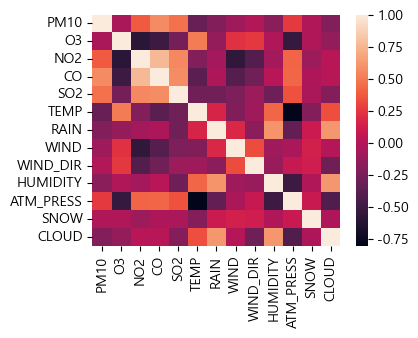

In [25]:
a = df.corr(method='spearman').round(3)
plt.figure(figsize=(4,3))
sns.heatmap(a)

In [26]:
# df=df.drop(['SNOW','O3','WIND_DIR'],axis=1)

### 3. EDA

<span style="font-size:18px"> 1) 기온(TEMP)에 따른 미세먼지 측정량</span><br>

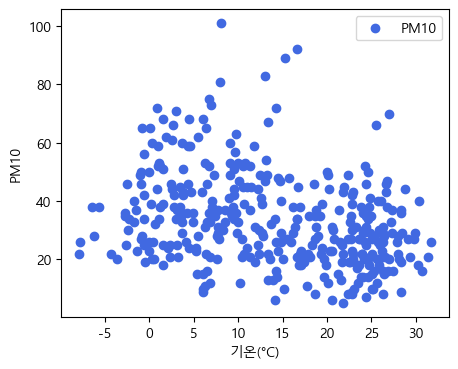

In [27]:
df_no=df.copy()
plt.figure(figsize=(5,4))
plt.scatter(df_no['TEMP'],df_no['PM10'],color='royalblue',label='PM10')
plt.xlabel('기온(°C)')
plt.ylabel('PM10')
plt.legend()
plt.show()

<span style="font-size:18px"> 2) 이산화질소 농도(NO)에 따른 미세먼지 측정량</span><br>

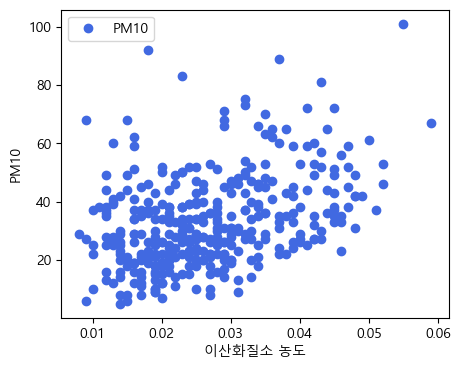

In [28]:
plt.figure(figsize=(5,4))
plt.scatter(df_no['NO2'],df_no['PM10'],color='royalblue',label='PM10')
plt.xlabel('이산화질소 농도')
plt.ylabel('PM10')
plt.legend()
plt.show()

<AxesSubplot:>

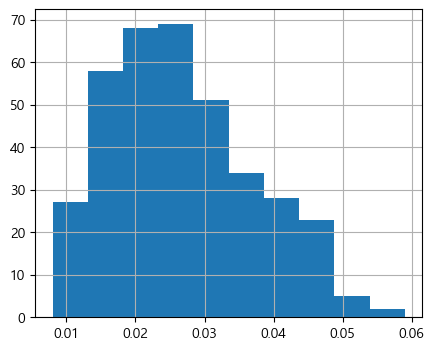

In [29]:
plt.figure(figsize=(5,4))
df_no['NO2'].hist()

<span style="font-size:18px"> 3) 파생변수 생성</span><br>

In [30]:
def no(x):
    if x<=df.NO2.quantile(0.25):
        return "low"
    if (x>df.NO2.quantile(0.25)) and (x<=df.NO2.quantile(0.5)):
        return "medium"
    else :
        return "high"

df_no['NO_CLASS'] = df_no['NO2'].apply(lambda x: no(x))
df_no.head()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,NO_CLASS
0,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70,medium
1,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83,medium
2,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29,medium
3,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54,high
4,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92,high


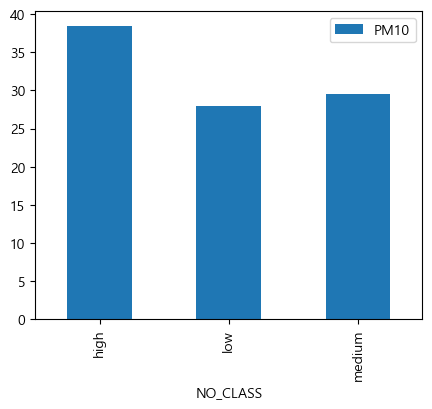

In [31]:
plt.figure(figsize=(5,4))
df_no1=df_no.groupby(['NO_CLASS'])['PM10'].mean()
df_no1.plot.bar()
plt.legend()

<AxesSubplot:ylabel='PM10'>

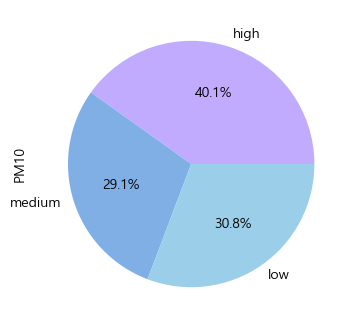

In [32]:
colors = ['#c1abff', '#80afe5', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5']
labels = ['high', 'medium', 'low']
plt.figure(figsize=(5,4))
df_no1.plot.pie(y='PM10', autopct='%.1f%%',labels=labels, colors=colors)

<AxesSubplot:xlabel='NO_CLASS', ylabel='NO2'>

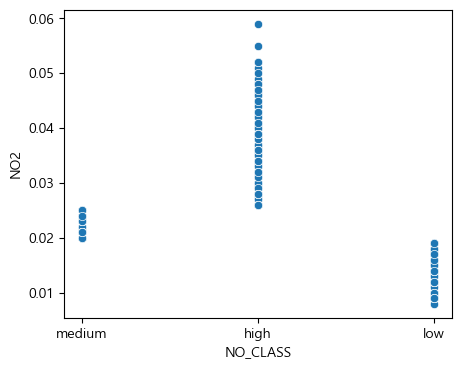

In [33]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="NO_CLASS",y="NO2",data=df_no)

<AxesSubplot:xlabel='NO_CLASS', ylabel='PM10'>

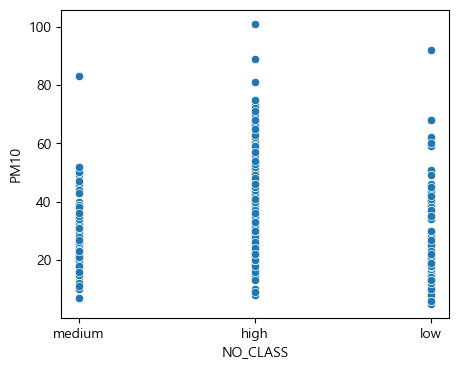

In [34]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="NO_CLASS",y="PM10",data=df_no)

In [35]:
df_no['NO_CLASS'].value_counts()

high      178
low       102
medium     85
Name: NO_CLASS, dtype: int64

<span style="font-size:18px"> 2) 기후(온도구간)별 평균 미세먼지 측정량</span><br>
<span style="font-size:16px"> [1] 온도

<AxesSubplot:>

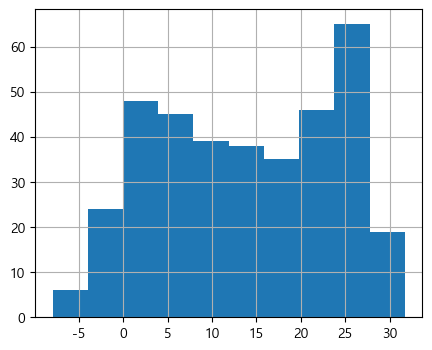

In [36]:
df_tp = df.copy()
plt.figure(figsize=(5,4))
df_tp['TEMP'].hist()

In [37]:
def no(x):
    if x<=7:
        return "winter"
    if (x>7) and (x<=20):
        return "spring or fall"
    else :
        return "summer"

df_tp['TEMP_CLASS'] = df_tp['TEMP'].apply(lambda x: no(x))
df_tp.head()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,TEMP_CLASS
0,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70,summer
1,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83,summer
2,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29,summer
3,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54,summer
4,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92,summer


<AxesSubplot:>

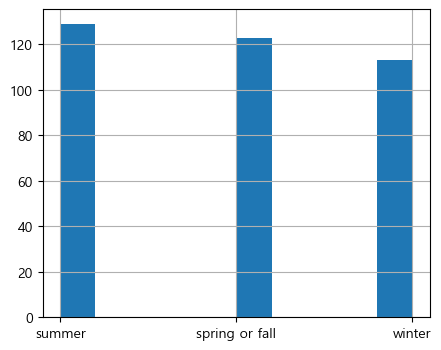

In [38]:
plt.figure(figsize=(5,4))
df_tp['TEMP_CLASS'].hist()

In [39]:
df_tp['TEMP_CLASS'].value_counts()

summer            129
spring or fall    123
winter            113
Name: TEMP_CLASS, dtype: int64

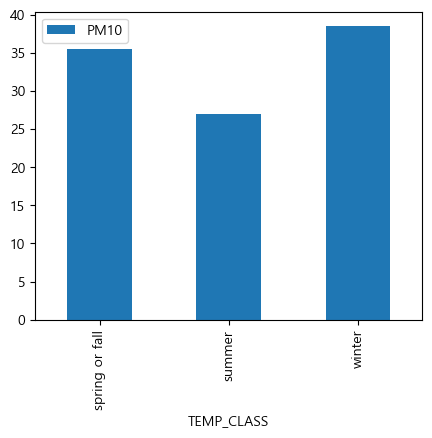

In [40]:
plt.figure(figsize=(5,4))
df_tp1=df_tp.groupby(['TEMP_CLASS'])['PM10'].mean()
df_tp1.plot.bar()
plt.legend()

<AxesSubplot:ylabel='PM10'>

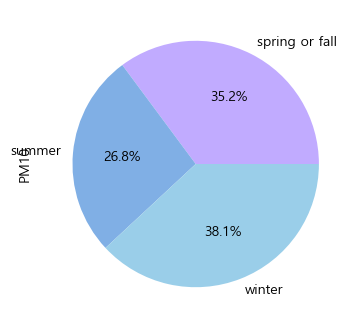

In [41]:
colors = ['#c1abff', '#80afe5', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5']
labels = ['spring or fall', 'summer', 'winter'] 
plt.figure(figsize=(5,4))
df_tp1.plot.pie(y='PM10', autopct='%.1f%%',labels=labels, colors=colors)

<AxesSubplot:xlabel='TEMP_CLASS', ylabel='TEMP'>

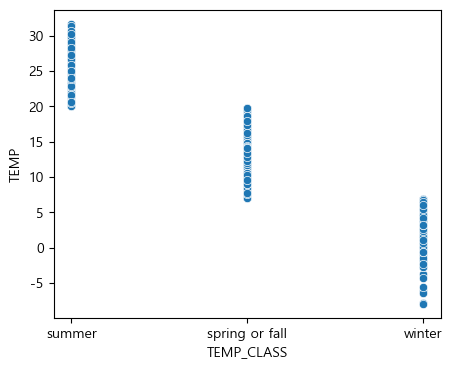

In [42]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="TEMP_CLASS",y="TEMP",data=df_tp)

<AxesSubplot:xlabel='TEMP_CLASS', ylabel='PM10'>

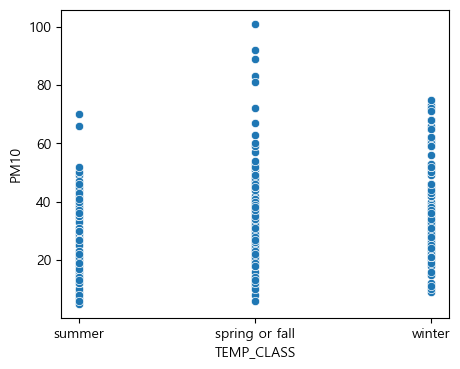

In [43]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="TEMP_CLASS",y="PM10",data=df_tp)

<span style="font-size:18px"> 3) 월별 미세먼지 측정량 비교</span><br>


In [44]:
df_month = df_1.copy()
df_month.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92


In [45]:
df_month['MeasDate']= df_month['MeasDate'].astype(str)
df_month['Date'] = df_month['MeasDate'].apply(lambda x:x[:7])

In [46]:
# df_month['MeasDate'] = pd.to_datetime(df_month['MeasDate'])

# df_month['Year'] = str(df_month['MeasDate'].dt.year)
# df_month['Month'] = str(df_month['MeasDate'].dt.month)

# # for i in range(len(df_month)):
# #     df_month['YM'][i]=str(df_month['Year'][i])+"-"+str(df_month['Month'][i])
# df_month

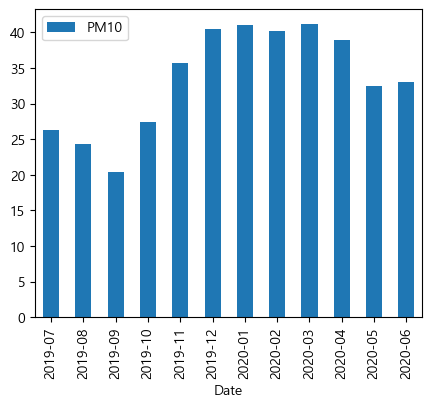

In [47]:
plt.figure(figsize=(5,4))
df_month1=df_month.groupby(['Date'])['PM10'].mean()
df_month1.plot.bar()
plt.legend()


<AxesSubplot:ylabel='PM10'>

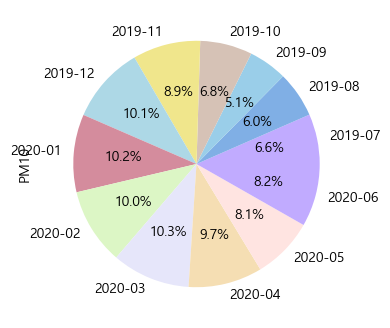

In [48]:
colors = ['#c1abff', '#80afe5', '#9acee9', '#d6c2b6', 'khaki','lightblue',
          '#d48c9d', '#dcf6c5','lavender','wheat','mistyrose']
plt.figure(figsize=(5,4))
df_month1.plot.pie(y='PM10', autopct='%.1f%%', colors=colors)

In [49]:
df_month['Month'] = df_month['MeasDate'].apply(lambda x:x[5:7])
df_month['Month']=df_month['Month'].astype(int)

<AxesSubplot:xlabel='Month', ylabel='PM10'>

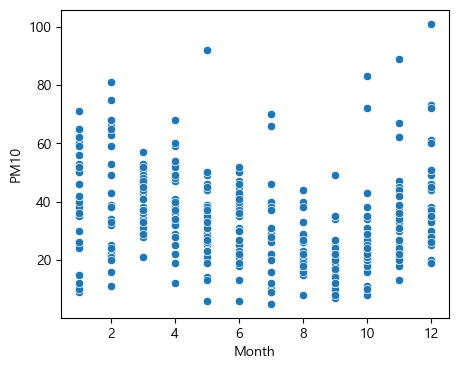

In [50]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="Month",y="PM10",data=df_month)

In [51]:
# 'PM10', '
# 'CO', 'SO2', 
# 'HUMIDITY', 'ATM_PRESS', 'CLOUD'

### 4. 데이터 전처리_2

<span style="font-size:18px"> 1) 파생변수 생성

<span style="font-size:16px"> (1) 날씨 변수 생성

In [52]:
df = df_1.copy()

def no(x):
    if x<=7:
        return "winter"
    if (x>7) and (x<=20):
        return "spring or fall"
    else :
        return "summer"

df['TP_CLASS'] = df['TEMP'].apply(lambda x: no(x))
df

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,TP_CLASS
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70,summer
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83,summer
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29,summer
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54,summer
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73,summer
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21,summer
363,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63,summer
364,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58,summer


In [53]:
pd.DataFrame(df['TP_CLASS'].value_counts())

,TP_CLASS
summer,129
spring or fall,123
winter,113


<span style="font-size:14px"> • 범주형 변수를 라벨인코딩 // 1:여름, 2:봄/가을, 0:겨울

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['TP_CLASS'] = le.fit_transform(df['TP_CLASS'])
df.head(10)

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,TP_CLASS
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70,1
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83,1
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29,1
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54,1
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92,1
5,2019-07-06,29.0,0.043,0.032,0.5,0.003,29.87,0.00,1.54,80,39.7,993.7,0.0,3.50,1
6,2019-07-07,16.0,0.043,0.014,0.3,0.002,26.86,0.00,2.27,83,43.5,997.5,0.0,6.58,1
7,2019-07-08,10.0,0.035,0.019,0.3,0.002,25.13,0.00,1.96,76,45.3,997.9,0.0,6.58,1
8,2019-07-09,10.0,0.033,0.019,0.4,0.002,25.11,0.00,1.84,81,46.3,996.7,0.0,4.42,1
9,2019-07-10,9.0,0.027,0.019,0.3,0.002,22.79,0.82,2.13,80,61.0,997.3,0.0,8.29,1


In [55]:
df['TP_CLASS'].value_counts()

1    129
0    123
2    113
Name: TP_CLASS, dtype: int64

In [58]:
dfs=df.copy()

<span style="font-size:16px"> (2) 전일 PM10 농도 변수 생성 </span> <br><br>
<span style="font-size:14px"> • 전일 PM10 농도 <br> 전일 PM10 농도는 당일 PM10 농도를 예측하는 데에 중요한 변수 중 하나임. <br> 전일 PM10 농도가 높을수록 당일 PM10 농도가 높아질 가능성이 높다.

<span style="font-size:14px"> ⇒ 생성하려 했으나 328번째 행에서 지속적인 오류발생으로 생략하고 진행함.

In [57]:
# dfa=df.copy()
# dfa['before_pm10']=dfa['PM10']

# for i in range(len(dfa)):
#     # 첫 데이터는 그대로
#     if i==0:
#         pass
#     elif 1<=i<=(len(dfa)-2):
#         dfa['before_pm10'][i]=dfa['PM10'][i-1]
#     else :
#         pass
# dfa

<span style="font-size:18px"> 2) 분석용 데이터 준비

In [59]:
####정규성 만족 시킨 뒤 다중회귀 분석 ###

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfs[['PM10', 'O3', 'NO2', 'CO', 'SO2','TEMP', 'RAIN','WIND', 'WIND_DIR', 'HUMIDITY', 
     'ATM_PRESS', 'SNOW', 'CLOUD']] = scaler.fit_transform(dfs[['PM10', 'O3', 'NO2', 'CO', 'SO2','TEMP',
                                                                 'RAIN', 'WIND', 'WIND_DIR', 'HUMIDITY', 
                                                                 'ATM_PRESS', 'SNOW', 'CLOUD']])

In [60]:
# df1['PM_Class'] = df['PM_CLASS']
# df1
dfs

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,TP_CLASS
0,2019-07-01,-0.277826,2.558984,-0.566824,-0.049871,-0.052053,1.035373,-0.337916,0.105769,0.561308,0.204900,-1.325967,-0.103499,0.216196,1
1,2019-07-02,-0.466314,2.474806,-0.664322,-0.049871,-0.052053,1.061826,-0.337916,0.050401,0.787644,0.204900,-0.894922,-0.103499,-0.410992,1
2,2019-07-03,-0.214997,1.548858,-0.371828,-0.749989,-0.052053,1.050634,-0.337916,-0.600182,0.999835,0.349878,-0.931868,-0.103499,0.414079,1
3,2019-07-04,-0.340655,0.875442,-0.079334,-0.749989,-0.052053,1.169676,-0.337916,-0.254127,0.759352,-0.112673,-1.141233,-0.103499,-0.843651,1
4,2019-07-05,-0.277826,1.801390,0.798148,-0.049871,-0.052053,1.368080,-0.337916,-1.070816,-0.485500,-1.017064,-1.523017,-0.103499,-0.380806,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,-0.906119,1.296327,-1.054314,-0.749989,-0.052053,0.794236,0.027917,1.240829,0.264241,1.640879,-1.215127,-0.103499,1.232442,1
362,2020-06-27,-0.717631,1.717213,-0.956816,-0.749989,1.531226,1.026215,-0.337916,-0.406391,0.108634,0.660547,-1.239758,-0.103499,0.387248,1
363,2020-06-28,-0.403485,1.717213,-1.736801,-0.749989,-0.052053,1.137118,-0.337916,0.174980,1.042273,0.764103,-1.375230,-0.103499,-0.813465,1
364,2020-06-29,0.161979,0.202025,0.115662,0.650246,-0.052053,1.038425,0.786352,0.354929,-1.504016,1.054061,-1.596910,-0.103499,0.846738,1


In [61]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   365 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         365 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       365 non-null    float64       
 7   RAIN       365 non-null    float64       
 8   WIND       365 non-null    float64       
 9   WIND_DIR   365 non-null    float64       
 10  HUMIDITY   365 non-null    float64       
 11  ATM_PRESS  365 non-null    float64       
 12  SNOW       365 non-null    float64       
 13  CLOUD      365 non-null    float64       
 14  TP_CLASS   365 non-null    int32         
dtypes: datetime64[ns](1), float64(13), int32(1)
memory usage: 44.2 KB


In [62]:
dfs

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,TP_CLASS
0,2019-07-01,-0.277826,2.558984,-0.566824,-0.049871,-0.052053,1.035373,-0.337916,0.105769,0.561308,0.204900,-1.325967,-0.103499,0.216196,1
1,2019-07-02,-0.466314,2.474806,-0.664322,-0.049871,-0.052053,1.061826,-0.337916,0.050401,0.787644,0.204900,-0.894922,-0.103499,-0.410992,1
2,2019-07-03,-0.214997,1.548858,-0.371828,-0.749989,-0.052053,1.050634,-0.337916,-0.600182,0.999835,0.349878,-0.931868,-0.103499,0.414079,1
3,2019-07-04,-0.340655,0.875442,-0.079334,-0.749989,-0.052053,1.169676,-0.337916,-0.254127,0.759352,-0.112673,-1.141233,-0.103499,-0.843651,1
4,2019-07-05,-0.277826,1.801390,0.798148,-0.049871,-0.052053,1.368080,-0.337916,-1.070816,-0.485500,-1.017064,-1.523017,-0.103499,-0.380806,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,-0.906119,1.296327,-1.054314,-0.749989,-0.052053,0.794236,0.027917,1.240829,0.264241,1.640879,-1.215127,-0.103499,1.232442,1
362,2020-06-27,-0.717631,1.717213,-0.956816,-0.749989,1.531226,1.026215,-0.337916,-0.406391,0.108634,0.660547,-1.239758,-0.103499,0.387248,1
363,2020-06-28,-0.403485,1.717213,-1.736801,-0.749989,-0.052053,1.137118,-0.337916,0.174980,1.042273,0.764103,-1.375230,-0.103499,-0.813465,1
364,2020-06-29,0.161979,0.202025,0.115662,0.650246,-0.052053,1.038425,0.786352,0.354929,-1.504016,1.054061,-1.596910,-0.103499,0.846738,1


In [63]:
df

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,TP_CLASS
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70,1
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83,1
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29,1
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54,1
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73,1
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21,1
363,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63,1
364,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58,1


<span style="font-size:14px"> • scale 변환한 데이터는 다중회귀 분석 // dfs </span> <br>
<span style="font-size:14px"> • scale 변환 없이 사용하는 데이터는 트리 모델에 사용한다. // df </span>

### 5. 데이터 모델링

<span style="font-size:14px"> 1) 상관분석 <br> 2) 주성분분석 <br> 3) 다중회귀분석 <br> 4) 의사결정나무 <br> 5) 랜덤포래스트 <br> 6) 그래디언트 부스팅

<font size='4em' color='lightcoral'> 1) 다중회귀분석

In [98]:
# train, test 데이터 분리
df_train, df_test = train_test_split(dfs, test_size=0.3, random_state=1234)
print('train data size : {}'.format(df_train.shape))
print('test data size : {}'.format(df_test.shape))

train data size : (255, 15)
test data size : (110, 15)


In [99]:
dfs.columns

Index(['MeasDate', 'PM10', 'O3', 'NO2', 'CO', 'SO2', 'TEMP', 'RAIN', 'WIND',
       'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'SNOW', 'CLOUD', 'TP_CLASS'],
      dtype='object')

<span style="background:palegoldenrod;font-size:16px"> 선형회귀분석 1

In [100]:
# 선형회귀 분석_1
reg_model = smf.ols(formula="PM10~O3+NO2+CO+SO2+TEMP+RAIN+\
WIND+WIND_DIR+HUMIDITY+ATM_PRESS+SNOW+CLOUD+TP_CLASS",data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     21.45
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           2.26e-33
Time:                        22:15:39   Log-Likelihood:                -262.04
No. Observations:                 255   AIC:                             552.1
Df Residuals:                     241   BIC:                             601.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1602      0.077      2.076      0.0

<span style="font-size:14px"> • 분산분석 결과 P값이 0.05보다 작으므로 회귀모델로서 유의함. <br> • 수정 결정계수는 0.511로 모델의 설명력은 51.1%다. <br> • 유의하지 않은 변수를 하나씩 제거한다. (P-value가 가장 큰 변수는 CLOUD다.)

<span style="background:palegoldenrod;font-size:16px"> 선형회귀 분석 2 (CLOUD 제거)

In [101]:
# 선형회귀 분석_2 / CLOUD 제거
reg_model = smf.ols(formula="PM10~O3+NO2+CO+SO2+TEMP+RAIN+\
WIND+WIND_DIR+HUMIDITY+ATM_PRESS+SNOW+TP_CLASS",data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     23.33
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           4.56e-34
Time:                        22:15:39   Log-Likelihood:                -262.04
No. Observations:                 255   AIC:                             550.1
Df Residuals:                     242   BIC:                             596.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1603      0.077      2.084      0.0

<span style="font-size:14px"> • 분산분석 결과 P값이 0.05보다 작으므로 회귀모델로서 유의함. <br> • 수정 결정계수는 0.513로 모델의 설명력은 51.3%다. (증가) <br> • 유의하지 않은 변수를 하나씩 제거한다. (P-value가 가장 큰 변수는 RAIN다.)

<span style="background:palegoldenrod;font-size:16px"> 선형회귀분석 3 (RAIN 제거)

In [102]:
# 선형회귀 분석_3 /RAIN 제거
reg_model = smf.ols(formula="PM10~O3+NO2+CO+SO2+TEMP+WIND+WIND_DIR+HUMIDITY+ATM_PRESS+SNOW+TP_CLASS",data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     25.55
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           8.92e-35
Time:                        22:15:40   Log-Likelihood:                -262.05
No. Observations:                 255   AIC:                             548.1
Df Residuals:                     243   BIC:                             590.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1621      0.076      2.130      0.0

<span style="font-size:14px"> • 분산분석 결과 P값이 0.05보다 작으므로 회귀모델로서 유의함. <br> • 수정 결정계수는 0.515로 모델의 설명력은 51.5%다. (증가) <br> • 유의하지 않은 변수를 하나씩 제거한다. (P-value가 가장 큰 변수는 SNOW다.)

<span style="background:palegoldenrod;font-size:16px"> 선형회귀분석 4 (SNOW 제거)

In [103]:
# 선형회귀 분석_4 /SNOW 제거
reg_model = smf.ols(formula="PM10~O3+NO2+CO+SO2+TEMP+WIND+WIND_DIR+HUMIDITY+ATM_PRESS+TP_CLASS",data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     28.20
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           1.69e-35
Time:                        22:15:40   Log-Likelihood:                -262.09
No. Observations:                 255   AIC:                             546.2
Df Residuals:                     244   BIC:                             585.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1605      0.076      2.119      0.0

<span style="font-size:14px"> • 분산분석 결과 P값이 0.05보다 작으므로 회귀모델로서 유의함. <br> • 수정 결정계수는 0.515로 모델의 설명력은 51.7%다. (증가) <br> • 유의하지 않은 변수를 하나씩 제거한다. (P-value가 가장 큰 변수는 SO2다.)

<span style="background:palegoldenrod;font-size:16px"> 선형회귀분석 5 (SO2 제거)

In [104]:
# 선형회귀 분석_5 /SO2 제거
reg_model = smf.ols(formula="PM10~O3+NO2+CO+TEMP+WIND+WIND_DIR+HUMIDITY+ATM_PRESS+TP_CLASS",data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     31.38
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           3.50e-36
Time:                        22:15:40   Log-Likelihood:                -262.29
No. Observations:                 255   AIC:                             544.6
Df Residuals:                     245   BIC:                             580.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1560      0.075      2.072      0.0

<span style="font-size:14px"> • 분산분석 결과 P값이 0.05보다 작으므로 회귀모델로서 유의함. <br> • 수정 결정계수는 0.517로 모델의 설명력은 51.8%다. (증가) <br> • 유의하지 않은 변수를 하나씩 제거한다. (P-value가 가장 큰 변수는 HUMIDITY다.)

<span style="background:palegoldenrod;font-size:16px"> 선형회귀분석 6 (HUMIDITY 제거)

In [105]:
# 선형회귀 분석_6 /HUMIDITY 제거
reg_model = smf.ols(formula="PM10~O3+NO2+CO+TEMP+WIND+WIND_DIR+ATM_PRESS+TP_CLASS",data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     35.07
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           1.11e-36
Time:                        22:15:40   Log-Likelihood:                -263.00
No. Observations:                 255   AIC:                             544.0
Df Residuals:                     246   BIC:                             575.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1608      0.075      2.138      0.0

<span style="font-size:14px"> • 분산분석 결과 P값이 0.05보다 작으므로 회귀모델로서 유의함. <BR> • 수정 결정계수는 0.517로 모델의 설명력은 51.8%다. (증가) <br> • 유의하지 않은 변수를 하나씩 제거한다. (P-value가 가장 큰 변수는 ATM_PRESS다.)

<span style="background:palegoldenrod;font-size:16px"> 선형회귀분석 7 (ATM_PRESS 제거)

In [106]:
# 선형회귀 분석_7 /ATM_PRESS 제거
reg_model = smf.ols(formula="PM10~O3+NO2+CO+TEMP+WIND+WIND_DIR+TP_CLASS",data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     39.87
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           3.07e-37
Time:                        22:15:40   Log-Likelihood:                -263.63
No. Observations:                 255   AIC:                             543.3
Df Residuals:                     247   BIC:                             571.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1653      0.075      2.200      0.0

<span style="font-size:14px"> • 분산분석 결과 P값이 0.05보다 작으므로 회귀모델로서 유의함. <BR> • 수정 결정계수는 0.517로 모델의 설명력은 51.7%다. <br> • 유의하지 않은 변수를 하나씩 제거한다. (P-value가 가장 큰 변수는 NO2다.)

<span style="background:palegoldenrod;font-size:16px"> 선형회귀분석 8 (NO2 제거)

In [107]:
# 선형회귀 분석_8 /NO2 제거
reg_model = smf.ols(formula="PM10~O3+CO+TEMP+WIND+WIND_DIR+TP_CLASS",data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     45.96
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           1.22e-37
Time:                        22:15:40   Log-Likelihood:                -264.72
No. Observations:                 255   AIC:                             543.4
Df Residuals:                     248   BIC:                             568.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1915      0.073      2.620      0.0

<span style="font-size:14px"> • 분산분석 결과 P값이 0.05보다 작으므로 회귀모델로서 유의함. <br> • 수정 결정계수는 0.517로 모델의 설명력은 51.8%다. (증가) <br> • 유의하지 않은 변수를 하나씩 제거한다. (P-value가 가장 큰 변수는 WIND다.)

<span style="background:palegoldenrod;font-size:16px"> 선형회귀분석 9 (WIND 제거)

In [108]:
# 선형회귀 분석_9 /WIND 제거
reg_model = smf.ols(formula="PM10~O3+CO+TEMP+WIND_DIR+TP_CLASS",data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     54.75
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           3.24e-38
Time:                        22:15:42   Log-Likelihood:                -265.48
No. Observations:                 255   AIC:                             543.0
Df Residuals:                     249   BIC:                             564.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2043      0.072      2.821      0.0

<span style="font-size:14px"> • 분산분석 결과 P값이 0.05보다 작으므로 회귀모델로서 유의함. <BR> • 수정 결정계수는 0.517로 모델의 설명력은 51.8%다. (증가) <br> • 유의하지 않은 변수를 하나씩 제거한다. (P-value가 가장 큰 변수는 WIND다.)

In [109]:
## 다중 공선성 확인 ##
# 설명변수 간의 다중공선성 확인
df_train_x = df_train[['O3', 'CO','TEMP','WIND_DIR','TP_CLASS']]
df_train_x_const = add_constant(df_train_x)

# df로 저장
df_vif = pd.DataFrame()
df_vif['variable']=df_train_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_train_x_const,i) for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values('VIF',ascending=True).round(2)

#VIF가 10을 넘는 값이 없으므로 다중공선성은 발견되지 않는다.

,variable,VIF
5,TP_CLASS,1.25
4,WIND_DIR,1.27
2,CO,1.53
3,TEMP,1.82
1,O3,1.88
0,const,2.78


<span style="font-size:16px"> 잔차의 정규성, 등분산성, 독립성 확인

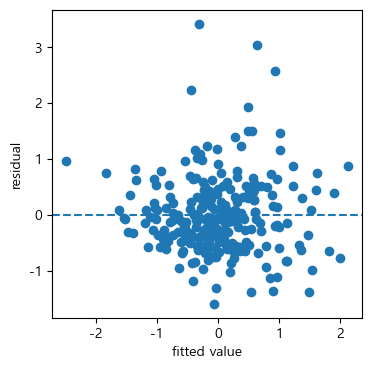

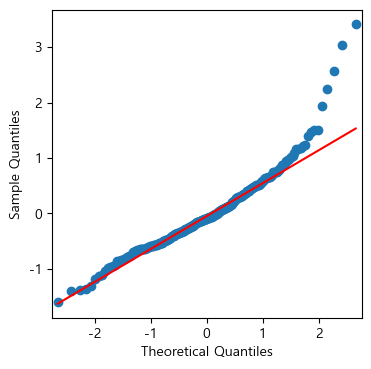

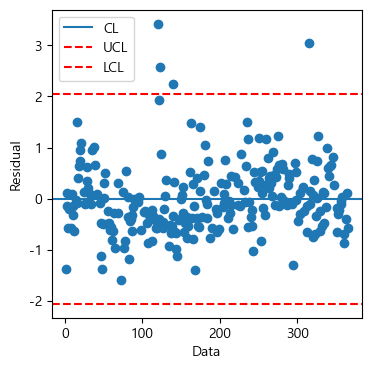

In [110]:
## 잔차 산점도
plt.figure(figsize=(4,4))
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y=0,linestyle='--')
plt.show()

## 잔차 정규성 검정
qq=qqplot(reg_result.resid, line='q')
qq.set_size_inches((4,4))
plt.show()

# 잔차의 독립성 확인
plt.figure(figsize=(4,4))
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel('Data');plt.ylabel('Residual')
plt.axhline(y=0,linestyle='-',label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color='red', label="UCL")
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color='red', label="LCL")
plt.legend()
plt.show()

<span style="font-size:14px"> → 잔차가 y=0 기준으로 랜덤하게 퍼져있기 때문에 등분산성을 만족하고 있다. <br> → 잔차가 y=0 기준으로 관리상하한을 벗어나 독립성을 만족하지 않는다.

In [111]:
# 성능확인

# 평가용 데이터에 대한 성능 확인
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print('train data의 결정계수 : ',r2_score(df_train['PM10'],train_pred))
print('test data의 결정계수 : ', r2_score(df_test['PM10'],test_pred))

train data의 결정계수 :  0.5236522337830057
test data의 결정계수 :  0.45291512371819975


<span style="font-size:14px"> • train data로 모델을 생성하여 예측한 결과, 0.52로 결정계수가 나타남.
<br> • test data로 모델을 생성하여 예측한 결과, 0.45로 결정계수가 나타남.

<font size='4em' color='lightcoral'> 2) 랜덤포래스트

In [112]:
df_rf = df.copy()
df_rf.drop(['MeasDate'],axis=1,inplace=True)

In [124]:
df_y = df_rf['PM10']
df_x = df_rf.drop('PM10',axis=1,inplace =False)

#train, test 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (255, 13)
train data Y size : (255,)
test data X size : (110, 13)
test data Y size : (110,)


In [125]:
rf_un = RandomForestRegressor(random_state=1234)
rf_un.fit(df_train_x,df_train_y)

print("Score on training set : {:.3f}".format(rf_un.score(df_train_x,df_train_y)))
print("Score on test set : {:.3f}".format(rf_un.score(df_test_x,df_test_y)))

Score on training set : 0.924
Score on test set : 0.479


<span style="font-size:14px"> -> 모델의 설명력은 train 92.4, test 47.9%로 모델은 train에 과대적합함. 파라미터 조정을 통해 모델의 일반화 성능을 올린다. 

In [127]:
# 1. n_estimators : 트리수 변경에 따른 모델 성능
train_score = []; test_score = []

para_n_tree = [n_tree *5 for n_tree in range(1,15)]

for v_min in para_n_tree:
    rf = RandomForestRegressor(random_state=1234, n_estimators=v_min)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과저장
df_score_n = pd.DataFrame()
df_score_n['MinSamplesLeaf']=para_n_tree
df_score_n['Train Score']=train_score
df_score_n['Test Score']=test_score
df_score_n.round(3)

,MinSamplesLeaf,Train Score,Test Score
0,5,0.883,0.441
1,10,0.891,0.453
2,15,0.907,0.482
3,20,0.903,0.479
4,25,0.907,0.472
5,30,0.910,0.462
6,35,0.910,0.465
7,40,0.912,0.458
8,45,0.918,0.468
9,50,0.919,0.458


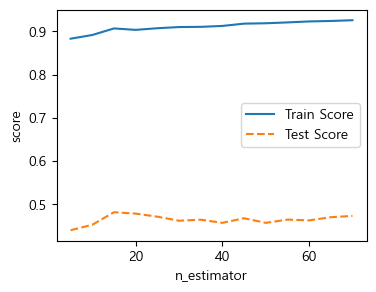

In [128]:
#모델 설명력 그래프 확인
plt.figure(figsize=(4,3))
plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle="--", label='Test Score')
plt.ylabel("score") ; plt.xlabel('n_estimator')
plt.legend()

<span style="font-size:14px"> - 생성하는 결정 트리 수가 증가해도 모델의 설명력은 0.482점대 중반을 유지함. <br> - 트리수가 15개를 초과하면 설명력은 거의 향상되지 않기 때문에 다른 파라미터의 영향을 확인하고자 15 선택. <br><br> -> 최종 모델에서 트리수 그래프에서 변화가 거의 없었음을 고려해 파라미터를 제거함.

In [133]:
## 2. min_samples_leaf :  잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능
train_score = []; test_score = []
#min_samples_leaf
para_leaf = [n_leaf *1 for n_leaf in range(1,11)]

for v_min in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators=15, 
                               min_samples_leaf=v_min)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['Train Score']=train_score
df_score_leaf['Test Score']=test_score
df_score_leaf.round(3)

,MinSamplesLeaf,Train Score,Test Score
0,1,0.907,0.482
1,2,0.861,0.487
2,3,0.815,0.498
3,4,0.779,0.497
4,5,0.743,0.494
5,6,0.716,0.466
6,7,0.683,0.456
7,8,0.665,0.447
8,9,0.647,0.467
9,10,0.626,0.439


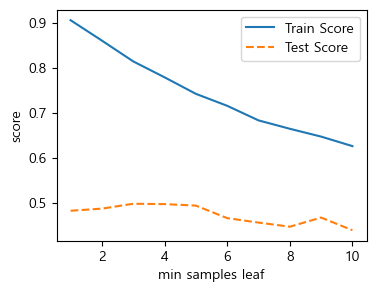

In [134]:
#모델 설명력 그래프 확인
plt.figure(figsize=(4,3))
plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle="--", label='Test Score')
plt.ylabel("score") ; plt.xlabel('min samples leaf')
plt.legend()

<span style="font-size:14px"> - 잎사귀 노드의 최소 자료수 증가에 따라 모델의 설명력은 감소함. <br> - test 데이터의 정확도 변화를 고려하여 3 선택 

In [143]:
## 3. min_samples_split :  분리 노드의 최소 자료 수 변경에 따른 모델 성능
train_score = []; test_score = []
#min_samples_leaf
para_split = [n_split *1 for n_split in range(2,21)]

for v_min in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators=15, 
                               min_samples_leaf=3, min_samples_split=v_min)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['Train Score']=train_score
df_score_split['Test Score']=test_score
df_score_split.round(3)

,MinSamplesSplit,Train Score,Test Score
0,2,0.815,0.498
1,3,0.815,0.498
2,4,0.815,0.498
3,5,0.815,0.498
4,6,0.815,0.498
5,7,0.805,0.497
6,8,0.796,0.510
7,9,0.785,0.497
8,10,0.773,0.499
9,11,0.763,0.498


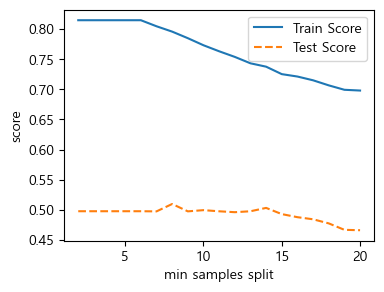

In [144]:
#모델 설명력 그래프 확인
plt.figure(figsize=(4,3))
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle="--", label='Test Score')
plt.ylabel("score") ; plt.xlabel('min samples split')
plt.legend()

<span style="font-size:14px"> - 분리노드 최소자료수 증가에 따라 모델의 설명력은 감소함. <br> - test 데이터의 정확도 변화를 고려하여 6 선택 <br>

In [137]:
## 4. max_depth :  최대 깊이 변경에 따른 모델 성능
train_score = []; test_score = []
#max_depth
para_depth = [n_depth for n_depth in range(1,21)]

for v_max in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators=15, 
                               min_samples_leaf=3,min_samples_split=6, max_depth=v_max)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과저장
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesLeaf']=para_depth
df_score_depth['Train Score']=train_score
df_score_depth['Test Score']=test_score
df_score_depth.round(3)

,MinSamplesLeaf,Train Score,Test Score
0,1,0.285,0.278
1,2,0.439,0.372
2,3,0.577,0.454
3,4,0.672,0.486
4,5,0.744,0.484
5,6,0.784,0.489
6,7,0.804,0.498
7,8,0.811,0.493
8,9,0.814,0.495
9,10,0.815,0.497


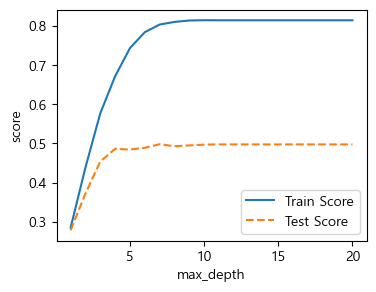

In [138]:
#모델 설명력 그래프 확인
plt.figure(figsize=(4,3))
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle="--", label='Test Score')
plt.ylabel("score") ; plt.xlabel('max_depth')
plt.legend()

<span style="font-size:14px">  - 최대 깊이 증가에 따라 모델의 설명력은 증가함. <br>- train, test 데이터의 정확도 변화를 고려하여 5 선택 <br>


In [140]:
## 최종모델
rf_final = RandomForestRegressor(random_state=1234, 
                               min_samples_leaf=3,min_samples_split=6, max_depth=10)
rf_final.fit(df_train_x,df_train_y)

print("Score on training set : {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x,df_test_y)))

Score on training set : 0.833
Score on test set : 0.513


<span style="font-size:14px"> - 랜덤포레스트에서 잎사귀의 최소 샘플수가 3, 분리노드 최소 자료수가 6개일 때, 모델의 설명력은 train에서 83.3%, test에서 51.3%다.

In [176]:
v_feature_name = df_train_x.columns

In [177]:
# 변수중요도
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace =True)
df_importance.round(3)

,Feature,Importance
2,CO,0.393
0,O3,0.142
11,CLOUD,0.094
6,WIND,0.081
7,WIND_DIR,0.065
8,HUMIDITY,0.057
9,ATM_PRESS,0.047
4,TEMP,0.046
1,NO2,0.037
5,RAIN,0.020


Text(0, 0.5, '변수')

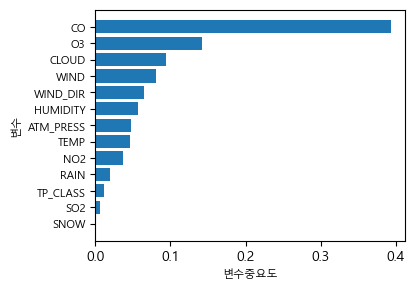

In [183]:
df_imp=df_importance
df_imp.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_imp))
plt.figure(figsize=(4,3))
plt.barh(y=coordinates, width=df_imp['Importance'])
plt.yticks(coordinates,df_imp['Feature'],fontsize=8)
plt.xlabel('변수중요도',fontsize=8)
plt.ylabel('변수',fontsize=8)

<font size='4em' color='lightcoral'> 3) 그래디언트 부스팅 </span>

In [148]:
gb_un = GradientBoostingRegressor(random_state=1234)
gb_un.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_un.score(df_train_x,df_train_y)))
print("Score on test set : {:.3f}".format(gb_un.score(df_test_x,df_test_y)))

Score on training set : 0.929
Score on test set : 0.467


<span style="font-size:14px"> -> 모델의 설명력은 train 0.929, test 0.467으로 train에 과대적합되었다. 파라미터 조정을 통해 모델의 일반화 성능을 올릴 수 있는지 살펴본다.  

<span style="background:palegoldenrod;font-size:16px"> - 1. n_estimators 트리수 변경에 따른 모델 성능 변화 </span> 

In [149]:
# 1. n_estimators : 트리수 변경에 따른 모델 성능

train_score = []; test_score = []
para_n_tree = [n_tree *5 for n_tree in range(1,21)]

for v_min in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=v_min)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
#결과저장
df_score_n = pd.DataFrame()
df_score_n['Estimators']=para_n_tree
df_score_n['Train Score']=train_score
df_score_n['Test Score']=test_score
df_score_n.round(3)

,Estimators,Train Score,Test Score
0,5,0.339,0.269
1,10,0.513,0.409
2,15,0.611,0.430
3,20,0.673,0.462
4,25,0.713,0.477
5,30,0.751,0.503
6,35,0.773,0.507
7,40,0.805,0.502
8,45,0.823,0.500
9,50,0.844,0.492


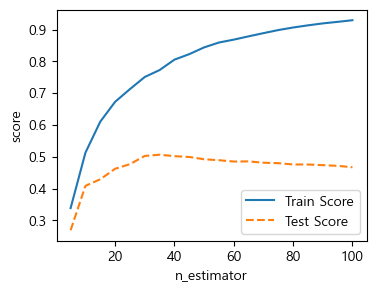

In [151]:
#모델 설명력 그래프 확인
plt.figure(figsize=(4,3))
plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle="--", label='Test Score')
plt.ylabel("score") ; plt.xlabel('n_estimator')
plt.legend()

<span style="font-size:14px"> - 트리 수 증가에 따라 모델의 설명력은 향상되다가 45부터 유지&감소함. <br> - test 데이터의 성능 변화를 고려해 35 선택함. 

<span style="background:palegoldenrod;font-size:16px"> - 2. min_samples_leaf : 잎사귀 노드의 최소자료수 변경에 따른 모델 성능 변화 </span> 

In [158]:
## 2. min_samples_leaf :  잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

train_score = []; test_score = []
#min_sample_leaf
para_leaf = [n_leaf *2 for n_leaf in range(1,21)]

for v_min in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=35)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
#결과저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['Train Score']=train_score
df_score_leaf['Test Score']=test_score
df_score_leaf.round(3)

,MinSamplesLeaf,Train Score,Test Score
0,2,0.773,0.507
1,4,0.773,0.507
2,6,0.773,0.507
3,8,0.773,0.507
4,10,0.773,0.507
5,12,0.773,0.507
6,14,0.773,0.507
7,16,0.773,0.507
8,18,0.773,0.507
9,20,0.773,0.507


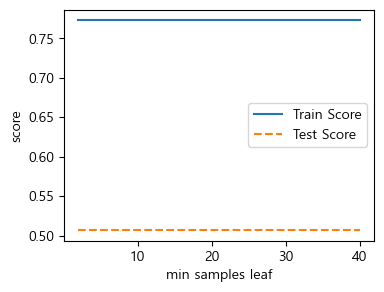

In [159]:
#모델 설명력 그래프 확인
plt.figure(figsize=(4,3))
plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle="--", label='Test Score')
plt.ylabel("score") ; plt.xlabel('min samples leaf')
plt.legend()

<span style="font-size:14px"> - 잎사귀 노드의 최소 자료 수에 따라 모델의 설명력은 변화가 없음. 미지정.

<span style="background:palegoldenrod;font-size:16px"> - 3. min_samples_split :  분리 노드의 최소자료수 변경에 따른 모델 성능 변화 </span> 

In [160]:
## 3. min_samples_split :  분리 노드의 최소 자료 수 변경에 따른 모델 성능
train_score = []; test_score = []
#min_samples_split : 분할하기 위한 노드의 최소 자료 수 
para_split = [n_split *2 for n_split in range(2,20)]

for v_min in para_split:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=35,min_samples_split=v_min)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf']=para_split
df_score_split['Train Score']=train_score
df_score_split['Test Score']=test_score
df_score_split.round(3)

,MinSamplesLeaf,Train Score,Test Score
0,4,0.773,0.507
1,6,0.773,0.507
2,8,0.775,0.501
3,10,0.767,0.499
4,12,0.770,0.498
5,14,0.769,0.491
6,16,0.765,0.482
7,18,0.765,0.483
8,20,0.759,0.484
9,22,0.753,0.494


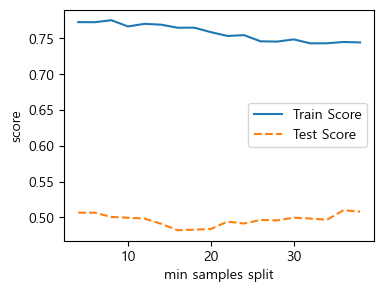

In [161]:
#모델 설명력 그래프 확인
plt.figure(figsize=(4,3))
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle="--", label='Test Score')
plt.ylabel("score") ; plt.xlabel('min samples split')
plt.legend()

<span style="font-size:14px"> • 분리 노드 최소 자료 수 증가에 따라 모델 설명력은 감소함. <br> • train/test 데이터의 성능 변화를 고려하여 36 선택 <br> • 20보다 적은 영역에서는 성능이 더 낮다.

<span style="background:palegoldenrod;font-size:16px"> - 4. max_depth :  최대 깊이 변경에 따른 모델 성능 변화 </span> 

In [168]:
## 4. max_depth :  최대 깊이 변경에 따른 모델 성능

train_score = []; test_score = []
#max_depth
para_depth = [n_depth for n_depth in range(1,11)]

for v_max in para_depth:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=35,min_samples_split=36,max_depth=v_max)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['Train Score']=train_score
df_score_depth['Test Score']=test_score
df_score_depth.round(3)


,Depth,Train Score,Test Score
0,1,0.417,0.367
1,2,0.630,0.489
2,3,0.745,0.510
3,4,0.819,0.468
4,5,0.859,0.437
5,6,0.882,0.465
6,7,0.907,0.460
7,8,0.918,0.449
8,9,0.915,0.460
9,10,0.928,0.479


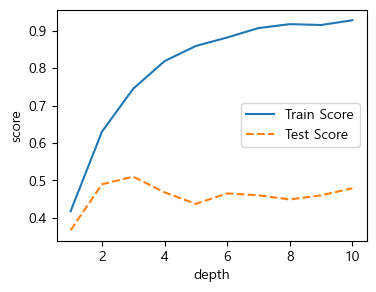

In [169]:
#모델 설명력 그래프 확인
plt.figure(figsize=(4,3))
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle="--", label='Test Score')
plt.ylabel("score") ; plt.xlabel('depth')
plt.legend()

<span style="font-size:14px"> • 최대 깊이 증가에 따라 모델의 설명력 증가함. <br> • test 데이터의 성능 변화를 고려해 4 선택 

<span style="background:palegoldenrod;font-size:16px"> - 5. learning_rate : 학습률 변경에 따른 모델 성능 변화 </span> 

In [170]:
# 5. learning_rate : 학습률 변경에 따른 모델 성능
train_score = []; test_score = []
# learning_rate
para_lr = [lr*0.05 for lr in range(1,30)]

for v in para_lr:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=35,min_samples_split=36,max_depth=3,learning_rate=v)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
#결과저장
df_score_lr = pd.DataFrame()
df_score_lr['Learning_rate']=para_lr
df_score_lr['Train Score']=train_score
df_score_lr['Test Score']=test_score
df_score_lr.round(3)

,Learning_rate,Train Score,Test Score
0,0.05,0.621,0.428
1,0.10,0.745,0.510
2,0.15,0.814,0.498
3,0.20,0.846,0.485
4,0.25,0.872,0.441
5,0.30,0.900,0.469
6,0.35,0.915,0.419
7,0.40,0.920,0.395
8,0.45,0.931,0.451
9,0.50,0.934,0.489


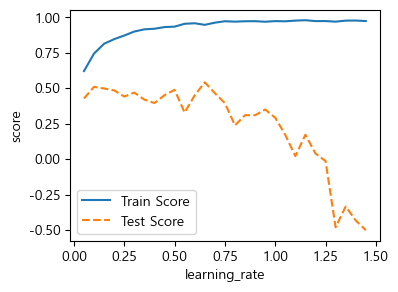

In [171]:
#모델 설명력 그래프 확인
plt.figure(figsize=(4,3))
plt.plot(para_lr, train_score, linestyle='-', label='Train Score')
plt.plot(para_lr, test_score, linestyle="--", label='Test Score')
plt.ylabel("score") ; plt.xlabel('learning_rate')
plt.legend()

<span style="font-size:14px"> • 학습률 증가에 따라 모델의 설명력 증가함. <br> • 하지만 테스트 데이터에서의 성능은 급격하게 떨어짐. <br> • 따라서 0.15 선택

In [173]:
# 최종 모델
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=35,min_samples_split=36,
                                     max_depth=3,learning_rate=0.65)
gb_final.fit(df_train_x,df_train_y)

print("Score on training set : {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x,df_test_y)))

Score on training set : 0.947
Score on test set : 0.542


<span style="font-size:16px"> [Default parameter] <br> Score on training set : 0.929<br> Score on test set : 0.467 <br>     ---------------------------- <br>     [adjust parameter] <br> Score on training set : 0.947 <br> Score on test set : 0.542 <br>
---------------------------- <br>


In [184]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace =True)
df_importance.round(3)

,Feature,Importance
2,CO,0.382
0,O3,0.164
4,TEMP,0.094
6,WIND,0.087
11,CLOUD,0.066
1,NO2,0.056
8,HUMIDITY,0.047
7,WIND_DIR,0.043
5,RAIN,0.041
9,ATM_PRESS,0.019


Text(0, 0.5, '변수')

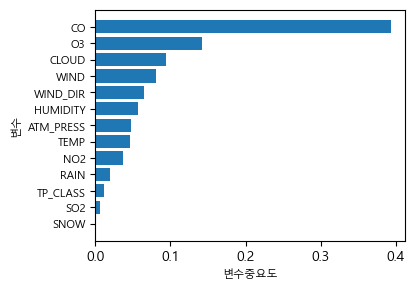

In [186]:
df_imp.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_imp))
plt.figure(figsize=(4,3))
plt.barh(y=coordinates, width=df_imp['Importance'])
plt.yticks(coordinates,df_imp['Feature'],fontsize=8)
plt.xlabel('변수중요도',fontsize=8)
plt.ylabel('변수',fontsize=8)

###  6. 결과 보고 및 적용, 마무리
<span style="font-size:18px"> 1) 모델 선정 </span> 

<span style="font-size:15px"> 1. 다중회귀 </span> <br>
<span style="font-size:13px"> train data의 결정계수 :  0.5236 <br> test data의 결정계수 :  0.4529 </span> 

<span style="font-size:15px"> 2. 랜덤 포레스트 </span> <br>
<span style="font-size:13px"> Score on training set : 0.833 <br> Score on test set : 0.513 </span> 

<span style="font-size:15px"> 3. Gradient Boosting </span> <br>
<span style="font-size:13px"> Score on training set : 0.947 <br> Score on test set : 0.542 </span>

<br>
<font size='4em' color='red'> => 3. Gradient Boosting 으로 최종 모델 선정 </font> 

<span style="font-size:18px"> 2) 결정 요인 </span> <br><br>
<span style="font-size:13px"> Random Forest와 Gradient Boost 모델에서는 변수 중요도가 같게 나타났다.일산화 탄소가 0.38, 오존이 0.16, 온도가 0.09, 바람이 0.08의 중요도를 보이는 등 
아황산 가스와 계절, 적설량을 제외한 모든 변수가 중요도를 가졌다. 따라서, 일산화 탄소가 높을수록, 오존이 높은 날일수록 미세먼지 수치가 높게 나타난다는 결론을 얻었다. 

<span style="font-size:18px"> 3) 대응 방안 </span> <br><br>
<span style="font-size:13px"> (1) 미세먼지 예/경보제 운영 <br> (2) 미세먼지 계절관리제 운영 (12월~2월) <Br> (3) 신재생 에너지 보급 확대 <br> (4) 고농도 미세먼지 비상저감조치 시행 <br> (5) 도로 미세먼지 청소작업 <br> (6) 전기승용차 구매 지원 </span> 

<span style="font-size:18px"> 3) 결론 </span> <br><br>
<span style="font-size:13px"> 이 프로젝트에서는 다중회귀, Random Forest, Gradient Boost Regression 모델을 사용하였다. 
예측 정확도는 다중회귀 : RF : GB = 45% : 50% : 54%로 높지 않은 설명력을 보였으나, 데이터의 양이 약 300개로 적은 양임에도 불구하고 이 정도의 수치가 나왔음을 고려한다면 
GB를 활용한 미세먼지 예측모델의 효과가 높을 것으로 예상된다.
